In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset/weatherHistory.csv




## Objective: Perform Data Cleaning, Perform Analysis for Testing the (given) Hypothesisand finally put-forth your conclusion by writing a blog article.

#### The Meteorological Dataset Consists of:

* Total Number of Data Point: 96453
* Total Number of Attribute/Columns in data set is 11.

#### Attribute Information:

1. Formatted Date
2. Summary
3. Precip Type
4. Temperature (C)
5. Apparent Temperature (C)
6. Humidity
7. Wind Speed (km/h)
8. Wind Bearing (degrees)
9. Visibility (km)
10. Pressure (millibars)
11. Daily Summary

## Loading the Data

In [2]:
#Python Library 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#Reading weatherHistory.csv file
df = pd.read_csv("/kaggle/input/weather-dataset/weatherHistory.csv")
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [4]:
#shape of Dataset
df.shape

(96453, 12)

In [5]:
#Statistical Summary of DataFrame
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
#Concise Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
#Missing Values on Dataset from String to Date Time
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

#### Observation:

* In 'Precip Type' Column there are 517 missing values.
* 'Wind Bearing (degrees)' has only integer values and Formatted Date is in String.
* Minimum values of Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km) are Zero and they can be Zero.

In [8]:
#Changing Formatted Date from String to Datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [9]:
#Now Formatted Date is in Date Time Format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [10]:
df.sample(20)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
84242,2015-03-19 04:00:00+00:00,Partly Cloudy,rain,0.050000,-4.422222,0.75,15.4721,20.0,15.1823,0.0,1023.29,Partly cloudy until night.
17942,2008-04-24 12:00:00+00:00,Mostly Cloudy,rain,15.233333,15.233333,0.43,13.8621,15.0,11.3988,0.0,1022.85,Partly cloudy throughout the day.
77636,2014-10-16 22:00:00+00:00,Overcast,rain,12.894444,12.894444,0.96,6.1341,171.0,4.8461,0.0,1012.97,Mostly cloudy until night.
5932,2006-05-13 03:00:00+00:00,Partly Cloudy,rain,9.500000,8.900000,0.89,6.0375,143.0,14.3451,0.0,1021.66,Partly cloudy starting in the morning.
80157,2015-08-02 22:00:00+00:00,Overcast,rain,22.105556,22.105556,0.77,24.8745,210.0,9.9820,0.0,1017.16,Mostly cloudy throughout the day.
84021,2015-03-09 23:00:00+00:00,Mostly Cloudy,rain,1.044444,-0.988889,0.78,6.4883,329.0,14.8120,0.0,1028.62,Partly cloudy until night.
82743,2015-07-17 16:00:00+00:00,Mostly Cloudy,rain,33.888889,34.972222,0.39,7.8246,203.0,15.8263,0.0,1015.08,Partly cloudy throughout the day.
64099,2013-02-28 18:00:00+00:00,Partly Cloudy,rain,3.094444,3.094444,0.94,4.1699,143.0,5.1037,0.0,1025.30,Foggy starting in the evening.
42589,2010-10-17 12:00:00+00:00,Mostly Cloudy,rain,12.655556,12.655556,0.82,8.3398,55.0,7.0196,0.0,1013.53,Foggy until morning.
4642,2006-06-02 08:00:00+00:00,Overcast,rain,11.066667,11.066667,0.93,23.6670,9.0,11.0446,0.0,1010.49,Overcast throughout the day.


In [11]:
#Checking Wheather this dataset has Duplicate Values or not
sum(df.duplicated())

24

# Explortary Data Analysis(EDA):
## Data Cleaning

In [12]:
#Number of Distinct Observation 
df.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [13]:
#DataFrame for Duplicate Values
df_duplicated = df[df.duplicated()]
df_duplicated

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
36072,2010-08-01 22:00:00+00:00,Clear,rain,18.800000,18.800000,0.93,6.2790,270.0,14.9086,0.0,1016.99,Partly cloudy starting in the afternoon contin...
36073,2010-08-01 23:00:00+00:00,Clear,rain,18.222222,18.222222,0.97,6.2790,291.0,14.9086,0.0,1017.09,Partly cloudy starting in the afternoon contin...
36074,2010-08-02 00:00:00+00:00,Clear,rain,18.072222,18.072222,0.98,11.2700,290.0,6.8425,0.0,1013.23,Partly cloudy starting in the afternoon contin...
36075,2010-08-02 01:00:00+00:00,Clear,rain,16.622222,16.622222,0.99,6.4400,300.0,11.9784,0.0,1016.78,Partly cloudy starting in the afternoon contin...
36076,2010-08-02 02:00:00+00:00,Clear,rain,16.094444,16.094444,0.99,3.0751,280.0,11.9784,0.0,1016.67,Partly cloudy starting in the afternoon contin...
36077,2010-08-02 03:00:00+00:00,Clear,rain,15.955556,15.955556,0.99,3.8801,276.0,9.9820,0.0,1016.69,Partly cloudy starting in the afternoon contin...
36078,2010-08-02 04:00:00+00:00,Clear,rain,17.088889,17.088889,1.00,6.4400,310.0,9.9820,0.0,1017.08,Partly cloudy starting in the afternoon contin...
36079,2010-08-02 05:00:00+00:00,Clear,rain,20.822222,20.822222,0.87,3.2200,300.0,9.9820,0.0,1017.27,Partly cloudy starting in the afternoon contin...
36080,2010-08-02 06:00:00+00:00,Clear,rain,23.405556,23.405556,0.74,1.8837,334.0,9.9820,0.0,1017.27,Partly cloudy starting in the afternoon contin...
36081,2010-08-02 07:00:00+00:00,Clear,rain,26.050000,26.050000,0.59,1.5939,5.0,9.9820,0.0,1017.15,Partly cloudy starting in the afternoon contin...


#### Observation:
* There are no Duplicate Values in this Dataset.

In [14]:
#DataFrame for only NaN Values for exploration.
df_null = df[df.isna().any(axis=1)]
df_null.head(20)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 14:00:00+00:00,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.9820,0.0,1002.40,Mostly cloudy until night.
52674,2012-04-11 16:00:00+00:00,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.9820,0.0,1001.79,Mostly cloudy until night.
52675,2012-04-11 17:00:00+00:00,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.9820,0.0,1001.60,Mostly cloudy until night.
52677,2012-04-11 19:00:00+00:00,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.9820,0.0,1001.92,Mostly cloudy until night.
52678,2012-04-11 20:00:00+00:00,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.1000,0.0,1002.20,Mostly cloudy until night.
52680,2012-04-11 22:00:00+00:00,Mostly Cloudy,NaN,10.100000,10.100000,0.61,11.3666,180.0,16.1000,0.0,1002.25,Light rain in the morning.
52681,2012-04-11 23:00:00+00:00,Partly Cloudy,NaN,10.183333,10.183333,0.64,7.2128,150.0,16.1000,0.0,1002.05,Light rain in the morning.
52683,2012-04-12 01:00:00+00:00,Mostly Cloudy,NaN,10.700000,10.700000,0.70,14.6993,133.0,16.1000,0.0,1001.42,Light rain in the morning.
52684,2012-04-12 02:00:00+00:00,Partly Cloudy,NaN,9.744444,8.022222,0.73,11.9623,142.0,16.1000,0.0,1001.11,Light rain in the morning.
52687,2012-04-12 05:00:00+00:00,Mostly Cloudy,NaN,10.055556,10.055556,0.76,13.9748,213.0,11.1090,0.0,1001.22,Light rain in the morning.


In [15]:
df_null.tail(20)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
95569,2016-10-31 03:00:00+00:00,Clear,NaN,1.905556,1.905556,0.88,4.7656,246.0,0.0,0.0,1024.98,Mostly cloudy starting in the afternoon.
95570,2016-10-31 04:00:00+00:00,Clear,NaN,1.894444,0.088889,0.89,6.2146,245.0,0.0,0.0,1024.84,Mostly cloudy starting in the afternoon.
95571,2016-10-31 05:00:00+00:00,Clear,NaN,1.983333,-0.133333,0.91,7.1645,252.0,0.0,0.0,1024.81,Mostly cloudy starting in the afternoon.
95572,2016-10-31 06:00:00+00:00,Clear,NaN,2.494444,0.227778,0.90,7.9373,258.0,0.0,0.0,1024.76,Mostly cloudy starting in the afternoon.
95573,2016-10-31 07:00:00+00:00,Clear,NaN,3.766667,1.561111,0.86,8.5169,258.0,0.0,0.0,1024.65,Mostly cloudy starting in the afternoon.
95574,2016-10-31 08:00:00+00:00,Clear,NaN,5.688889,3.783333,0.80,8.7262,259.0,0.0,0.0,1024.48,Mostly cloudy starting in the afternoon.
95575,2016-10-31 09:00:00+00:00,Clear,NaN,7.688889,6.177778,0.75,8.5813,264.0,0.0,0.0,1024.20,Mostly cloudy starting in the afternoon.
95576,2016-10-31 10:00:00+00:00,Clear,NaN,9.594444,7.972222,0.71,11.1251,276.0,0.0,0.0,1023.70,Mostly cloudy starting in the afternoon.
95577,2016-10-31 11:00:00+00:00,Clear,NaN,11.494444,11.494444,0.69,14.0553,284.0,0.0,0.0,1023.06,Mostly cloudy starting in the afternoon.
95578,2016-10-31 12:00:00+00:00,Clear,NaN,12.766667,12.766667,0.67,22.5400,286.0,0.0,0.0,1022.49,Mostly cloudy starting in the afternoon.


In [16]:
#Droping NaN(Not a Number)
df_target = df.dropna()
df_target.shape

(95936, 12)

In [17]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            95936 non-null  datetime64[ns, UTC]
 1   Summary                   95936 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           95936 non-null  float64            
 4   Apparent Temperature (C)  95936 non-null  float64            
 5   Humidity                  95936 non-null  float64            
 6   Wind Speed (km/h)         95936 non-null  float64            
 7   Wind Bearing (degrees)    95936 non-null  float64            
 8   Visibility (km)           95936 non-null  float64            
 9   Loud Cover                95936 non-null  float64            
 10  Pressure (millibars)      95936 non-null  float64            
 11  Daily Summary  

In [18]:
df_target.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [19]:
df_target = df_target.set_index("Formatted Date")
df_target

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.




**Given**:

The Null Hypothesis H0 is **"*Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming*".**

The Alternative Hypothesis H1 is **"*Has the Apparent temperature and humidity compared monthly across 10 years of the data not indicate an increase due to Global warming*".**


In [20]:
#Creating new DataFrame only for Apparent Temperature and Humidity
df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = df_target[df_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


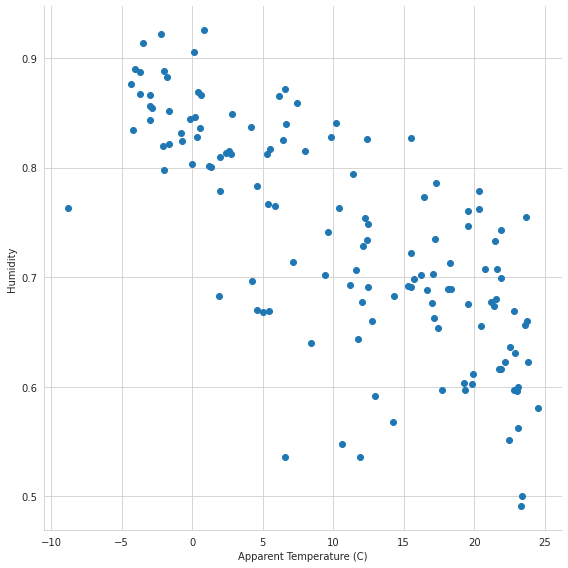

In [21]:
sns.set_style("whitegrid")
sns.FacetGrid(df_monthly_mean, height=8).map(plt.scatter, "Apparent Temperature (C)", "Humidity")
plt.show()

#### Observation:

* There can be or may be Linear Relationship between "Humidity" and "Apparent Temperature (C)" with negative slope.



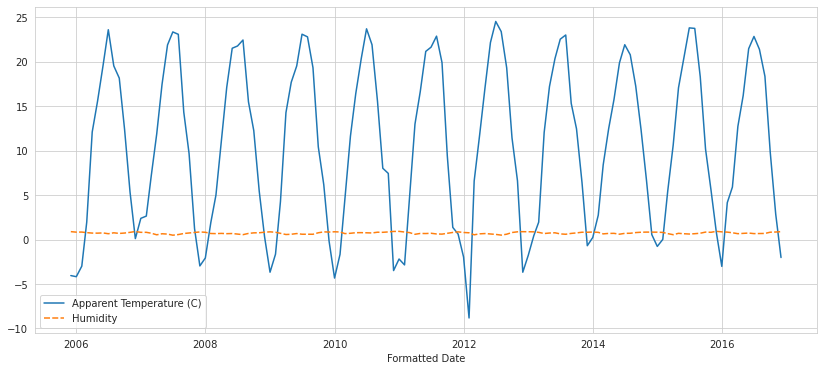

In [22]:
plt.figure(figsize=(14,6))
sns.lineplot(data = df_monthly_mean)
plt.show()

#### Observation:

* "Humidity" is remain constant from 2006 - 2016
* But "Apparent Temperature (C)" is frequently changes from 2006 - 2016

### 2D Scatter Plot with Color Coding for each Summary type

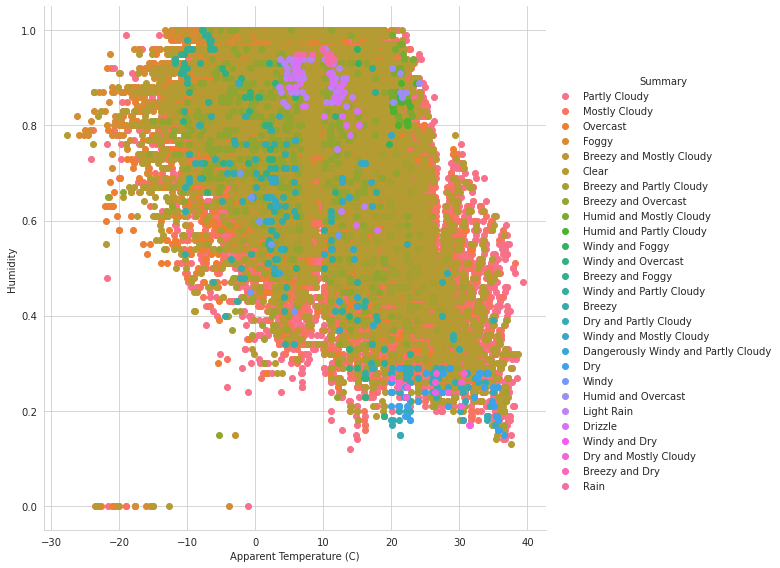

In [23]:
sns.set_style("whitegrid")
sns.FacetGrid(df_target, hue="Summary", height=8).map(plt.scatter, "Apparent Temperature (C)", "Humidity").add_legend()
plt.show()

#### Observation:

*    There are very few outlier.
*    Mostly Weather is Clear or Partly Cloudy/Rain in Finland.
*    Only few days there has a Light Rain or Dry or Dangerously Windy and Partly Cloudy.



### Univariate Analysis using PDF:

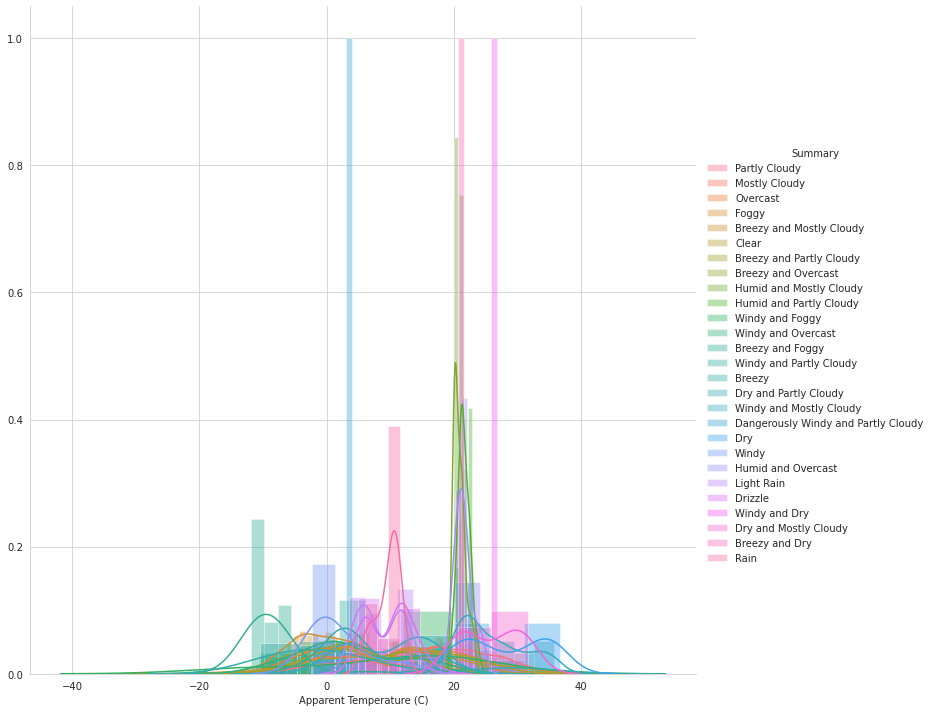

In [24]:
# For Apparent Temperature (C)
sns.FacetGrid(df_target, hue="Summary", height=10).map(sns.distplot, "Apparent Temperature (C)").add_legend()
plt.show()

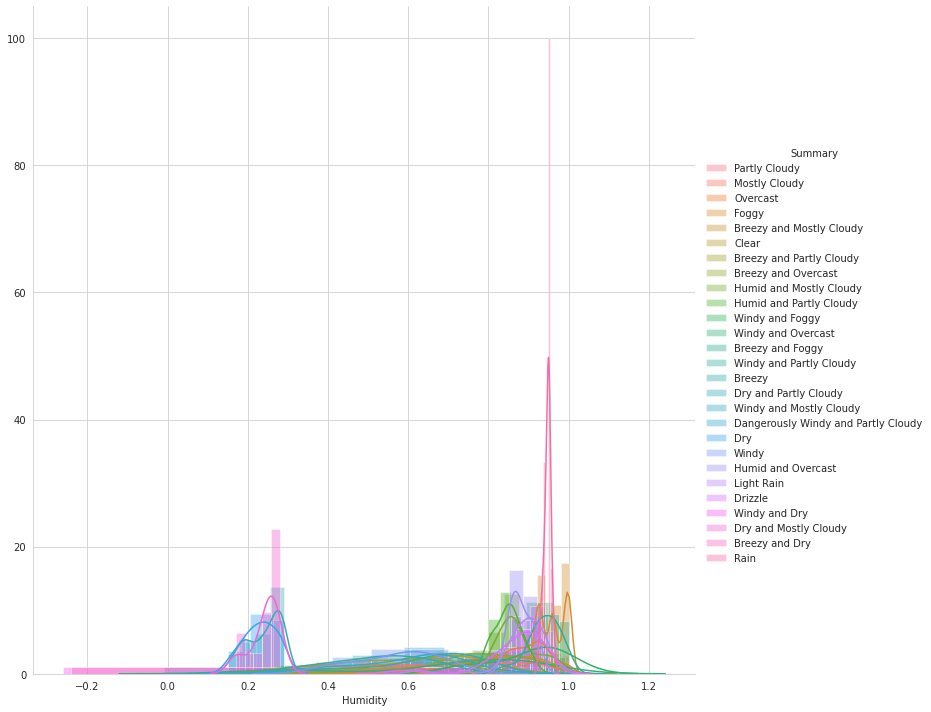

In [25]:
# For Humidity
sns.FacetGrid(df_target, hue="Summary", height=10).map(sns.distplot, "Humidity").add_legend()
plt.show()

#### Observation:

*    "Humidity" is better Feature than "Apparent Temperature (C)".

### Conclusion:

* H0 is not accepted because there is no change in Humidity from 2006–2016. So, we will accept the H1.
